<h2>Underwitting</h2>
<h3>Loan data for all loans issued by XYZ Corp. through 2007-2015.</h3>
<h3>Objective :-</h3>
<h4>You have to build a data model to predict the probability of default, and choose a cut-off based on what you feel is suitable. Alternatively you can also use a modelling technique which gives binary output.</h4>

In [1]:
import pandas as pd
import math
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from  collections import Counter 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import KFold
#from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table(r"C:\Users\kusha\Desktop\data sci\python\pythonProject\XYZCorp_LendingData.text" , index_col = None)

In [3]:
df.shape

(855969, 73)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<b>Creating Copy of dataframe.</b>

In [5]:
df_copy = pd.DataFrame.copy(df)
pd.set_option('display.max_columns', 80)
df_copy.head(n = 2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


<h3>Before proceeding ahead , lets remove those variables which are not important for modeling or prediction.</h3>

<h4>Variables "id" , "member_id" , "zip_code" , "addr_state" , "last_pymnt_d" , "next_pymnt_d" , "last_credit_pull_d","desc" and "policy_code" should be removed as they are not important for modeling. We wont remove "issue_d" for now cause we will have to use it for spliting our data in train and test .</h4>

In [6]:
remove_list = ["id" , "member_id" , "zip_code" , "addr_state" , "last_pymnt_d" , "next_pymnt_d" , "last_credit_pull_d" 
               , "desc" ,"policy_code"]
for i in remove_list:
    del df_copy[i]

<h4>The on going payment processes should not be considered as these values can mislead the machine to predict wrong values</h4>
<b>As the problem statement states : </b>
<h5>"In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.
The data should be divided into train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data."</h5><br>
<b>"DECIDING WHOM TO GIVE LOAN IN FUTURE"</b><br>
<b>So , variables like<b> <br>
<b>total_pymnt	: Payments received to date for total amount funded</b><br>
<b>total_pymnt_inv :	Payments received to date for portion of total amount funded by investors</b><br>
<b>total_rec_int :	Interest received to date </b><br>
<b>total_rec_late_fee :	Late fees received to date </b><br>
<b>total_rec_prncp	: Principal received to date</b><br>
<b>So whenever a customer comes for loan i wont ask him "How much amount of loan have you cleared yet ?" , how will the customer answer this question , when we have not yet decided whether to give loan or not to the customer.</b><br>
<b>And even this values may mislead the model to predict wrong values cause we have to predict on data of customers who's final loan payment date hasnt even arrived or have taken the loan recently .</b>

In [7]:
remove_list = ["total_pymnt" , "total_pymnt_inv" , "total_rec_int" , "total_rec_late_fee" , "total_rec_prncp"]
for i in remove_list:
    del df_copy[i]

In [8]:
df_copy.shape

(855969, 59)

<h3>Missing Values </h3> 

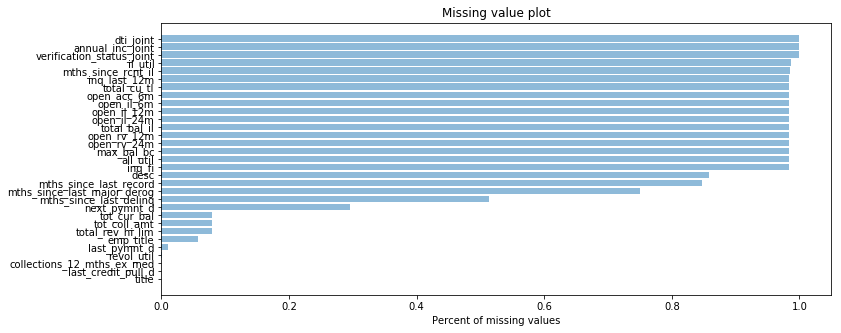

In [17]:
def nulls():
    mvs = pd.DataFrame()
    labels = []
    percent = []
    
    for cols in df.columns.values:
        if df[cols].isnull().sum() > 0:
            p = (df[cols].isnull().sum()/df.shape[0])
            labels.append(cols)
            percent.append(p)
    mvs["labels"] = labels
    mvs["percent"] = percent
    mvs = mvs.sort_values("percent")
    y_pos = np.arange(len(mvs))
    plt.barh(y_pos , mvs["percent"]  , align = "center" , alpha = 0.5)
    plt.yticks(y_pos , mvs["labels"])
    plt.xlabel("Percent of missing values")
    plt.title("Missing value plot") 
    plt.rcParams["figure.figsize"] = (15,5)
    plt.show()
nulls()

<b>1)As we can infer from the plot that many variables have missing values more than 40% of data.</b>
<br>
<b>2)In this case we can remove these variables which have missing values more than 40% .</b>
<h4>Before removing these column we can use dti_joint to combine dti and dti_joint of applicants type joint and replace these calculated dti values of applicants type joint with dti value.</h4>
<b>Cause Applicant type joint means 2 people together have issued loan .</b><br>
<b>So the dept to income(dti) ratio of one individual from applicant type joint is stored in dti and the dti ratio of other individual is saved in dti_joint.</b><br>
<b>If we remove dti_joint because of missing values then we might loose important information.</b><br>
<b>Dept to income ratio is very important feature or variable in underwritting , to predict whether the loan issuer will default or not.</b><br>
<h5>Formula to calculate Dept To Income Ratio :</h5>
<b>Debt to income ratio = Monthly Expenses / Monthly Income </b><br>
<br>
<b> To get joint dti of Applicant joint we will have find Monthly expenses of both the individuals of applicant type joint.</b><br>
<b>We can calculate Monthly Expense by multiplying  dept to income ratio into monthly income<b>

<h4>Another reason to compute this value is because ,the applicant type individual is more than 90% and applicant type joint are only 10% .This is a case of imbalanced independent variable, which can lead the model to perform bad.</h4>
<h3>Check the plot below.</h3>

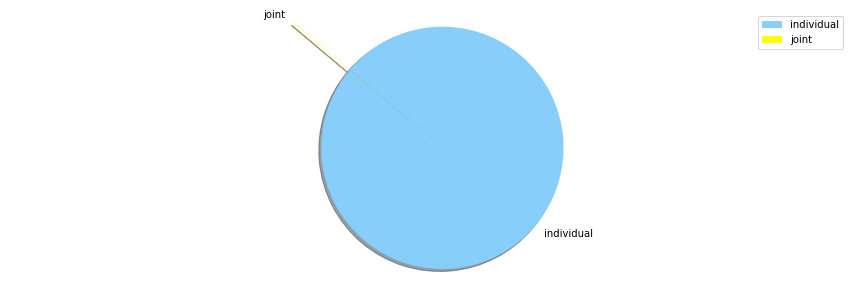

In [18]:
labels = 'individual', 'joint'
sizes = [855527, 442 ]
colors = ['lightskyblue', 'yellow']
explode = (0.10, 0.5)  # explode 1st slice
 
# Plot
patches , text = plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [19]:
df["application_type"].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

<b>There are only 442 joint applicants out of 855969 applicants ,which is very less.</b><br>
<b>Therefore creating new dti values for applicant type joint is a better option.</b><br>
<b>Same we can do with annual income and annual income joint.</b><br>

<b>So now lets create a functions to replace the dti ratio and annual income of joint applicant's.<b>

In [20]:
def newDti(df):
    monthly_inc = (df["annual_inc"][df["dti_joint"].isnull() == False]/12)
    monthly_inc_joint = (df["annual_inc_joint"][df["dti_joint"].isnull() == False]/12)
 
    dti_ = (df["dti"][df["dti_joint"].isnull() == False])
    dti_j = (df["dti_joint"][df["dti_joint"].isnull() == False])
    
    monthly_expenses = dti_*monthly_inc
    monthly_expenses_joint = dti_j*monthly_inc_joint
    
    numerator = monthly_expenses + monthly_expenses_joint
    denominator = monthly_inc + monthly_inc_joint    
    
    new_dti = numerator/denominator
    
    ind = df["dti"][df["dti_joint"].isnull() == False].index
    
    df["dti"][ind] = new_dti

def new_annual_inc(df):
    
    combined_inc = df["annual_inc"][df["annual_inc_joint"].isnull() == False] + df["annual_inc_joint"][df["annual_inc_joint"].isnull() ==  False]
    ind = df["annual_inc"][df["annual_inc_joint"].isnull() == False].index
    df["annual_inc"][ind] = combined_inc


In [21]:
newDti(df_copy)

In [22]:
new_annual_inc(df_copy)

<h3>Removing variables which have missing values more than 40%.</h3>

In [23]:
def remove_variables_missing_values_more_than_40_percent(df):
    for var in df.columns.values:
        if (df[var].isnull().sum()/df.shape[0]) >= 0.4:
            del df[var]
            
remove_variables_missing_values_more_than_40_percent(df_copy)

In [24]:
df_copy.shape

(855969, 39)

<h3>Below are the variables which are important according to the problem statement.</h3>

In [25]:
final_var= [
"annual_inc","delinq_2yrs","dti","emp_length","funded_amnt","grade","home_ownership","initial_list_status",
"installment","int_rate","loan_amnt","open_acc","inq_last_6mths","pub_rec","purpose","revol_bal","term",
"verification_status","tot_cur_bal","issue_d","recoveries","collections_12_mths_ex_med","default_ind"
]
def kep_col(data,var):
    for col in data.columns.values:
        if not col in var:
            del data[col]

kep_col(df_copy , final_var)

In [26]:
df_copy.shape

(855969, 23)

In [27]:
df_copy.isnull().sum()

loan_amnt                         0
funded_amnt                       0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
initial_list_status               0
recoveries                        0
collections_12_mths_ex_med       56
tot_cur_bal                   67313
default_ind                       0
dtype: int64

<h3>Treating missing values</h3>

In [28]:
print("mode : ",df_copy["tot_cur_bal"].mode()[0])
print("mean : ",np.mean(df_copy["tot_cur_bal"]))
print("quantile 0.05 : ",df_copy["tot_cur_bal"].quantile(0.05),"quantile 0.25 : ",df_copy["tot_cur_bal"].quantile(0.25) ,
      "quantile 0.50 : ", df_copy["tot_cur_bal"].quantile(0.50) , 
      "quantile 0.75 : ",df_copy["tot_cur_bal"].quantile(0.75) ,"quantile 0.95 : ", df_copy["tot_cur_bal"].quantile(0.95))

mode :  0.0
mean :  139766.24752870706
quantile 0.05 :  9174.75 quantile 0.25 :  29870.0 quantile 0.50 :  81008.5 quantile 0.75 :  208703.25 quantile 0.95 :  425148.25


In [29]:
df_copy['tot_cur_bal'].fillna(df_copy['tot_cur_bal'].mean(),inplace=True) 

In [30]:
df_copy['collections_12_mths_ex_med'].fillna(df_copy['collections_12_mths_ex_med'].mean(),inplace=True) 

<h3>Correlation Matrix</h3>

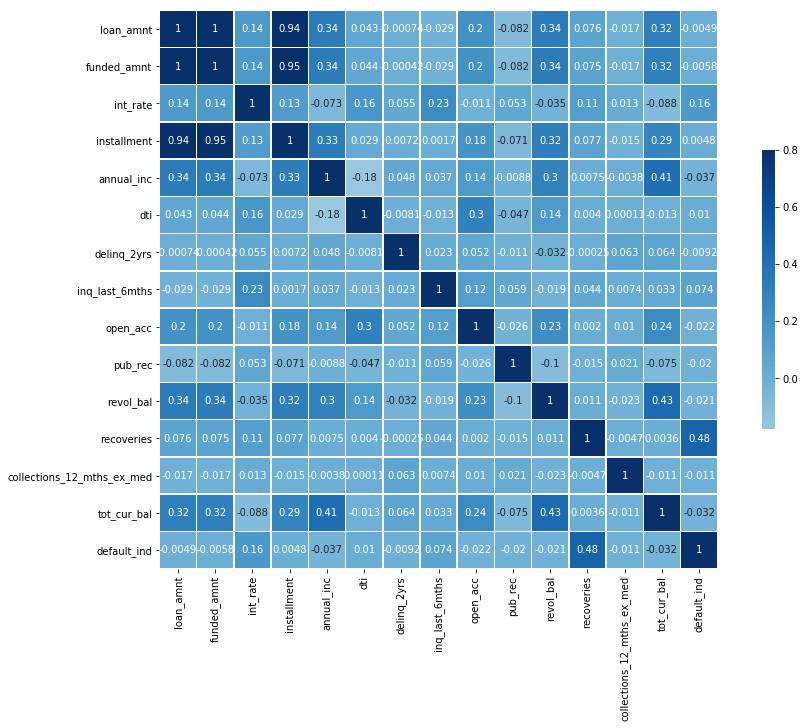

In [31]:
correlation_matrix = df_copy.corr()
a4_dimens = (15.7 , 10.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.heatmap(correlation_matrix, cmap="Blues", vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , 
            annot=True,
            xticklabels=correlation_matrix.columns.values ,
            yticklabels=correlation_matrix.columns.values,
            )

plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

<h4>From the below plot we infer that "loan_amnt","funded_amnt"and"installment" are highly correlated to each other and can lead the model to perform poor. So in this case we can remove funded_amnt and installment , both are derieved from loan_amnt . </h4>

In [32]:
del df_copy["installment" ]
del df_copy["funded_amnt"]

In [33]:
df_copy.shape

(855969, 21)

In [34]:
df_copy.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,recoveries,collections_12_mths_ex_med,tot_cur_bal,default_ind
count,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,8.559690e+05,855969.000000
mean,14745.571335,13.192320,7.512665e+04,18.092736,0.311621,0.680915,11.542447,0.194537,1.691053e+04,47.089499,0.014230,1.397662e+05,0.054286
std,8425.340005,4.368365,6.431335e+04,8.285908,0.857189,0.964033,5.308094,0.581585,2.222374e+04,413.136043,0.133707,1.477618e+05,0.226581
min,500.000000,5.320000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,9.990000,4.500000e+04,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,0.000000,0.000000,3.225000e+04,0.000000
50%,13000.000000,12.990000,6.500000e+04,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,0.000000,0.000000,1.005610e+05,0.000000
75%,20000.000000,15.990000,9.000000e+04,23.890000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,0.000000,0.000000,1.963730e+05,0.000000
max,35000.000000,28.990000,9.500000e+06,60.403669,39.000000,8.000000,90.000000,86.000000,2.904836e+06,33520.270000,20.000000,8.000078e+06,1.000000


In [35]:
def biased_IF(data):
    for x in data:
        val = data[x].unique()[0]
        s = data[x][data[x] == val].size
        p = (s/data.shape[0])*100
        
        if p >= 50 and (data[x].dtype == "int" or data[x].dtype == "float64") :
            
            print(x)
            print("value : ",val,"appearance : ",s , " : percent : ",p , "\n")
            
biased_IF(df_copy)

delinq_2yrs
value :  0.0 appearance :  692685  : percent :  80.9240755214266 

pub_rec
value :  0.0 appearance :  725455  : percent :  84.75248519514142 

recoveries
value :  0.0 appearance :  831782  : percent :  97.17431355574793 

collections_12_mths_ex_med
value :  0.0 appearance :  844768  : percent :  98.69142457261887 



<h4>From the above output we see that varibles recoveries  and collection_12_mths_ex_med have more than 90% biased values . This lead the model to perform poor . in this case we can remove these 2 variables .</h4>
<h4>But we can still use pub_rec and delinq_2yrs , we can convert these variables into categorical data .</h4>

In [37]:
df_copy = df_copy.drop(['recoveries','collections_12_mths_ex_med'],axis=1) 
df_copy.shape

(855969, 19)